## 1. Digit Recognition via Machine Learning 

Machine learning algorithms are one of the ways with which we create Artificial Intelligence. The distinguishing feature of machine learning compared to usual programming is training. Instead of programming the steps to get to the solution to a problem we program a machine learning algorithm to be trained to learn the steps towards the desired solution. 

In this notebook, you shall explore how to create a simple neural network using the tensorflow and keras libraries. The model shall aim to correctly tag hand written digits between 0 and 9, taken from the MNIST digit dataset.


## 1.1 The MNIST Dataset
The MNIST dataset is a large dataset consisting of 70,000 digits, split into 60,000 used for training, and 10,000 used for testing. It is made up of handwritten digits, from a mix of digits from employees of the American Census Bureau, and American high school students. Each digit has an associated label, which defines the intended value of each digit. It has become a well established dataset within the machine learning community, and is often recommended as the first task those new to machine learning should attempt. 

## 1.2 What is a Neural Network?

The neural network model is loosely based on the human brain. A Neuron receives a number of input signals, these signals are then processed at the neuron which passes on a new signal (fires) to the next neuron only if a certain condition is met. 

A neural network is a collection of artificial neurons organised in layers (as shown in the image below) that connect together allowing the neural network to learn complexities and make sophisticated decisions. The artificial neurons work by simple multiplication between the input signals (variables) coming into the node and a set of weights. If the produce of this multiplication is above a certain threshold, the neuron fires! 


![Neural Network](https://i.stack.imgur.com/OH3gI.png)

The neurons must be trained to process the signal appropriately so as to maximise the accuracy in decision making. To understand this, let's go back to the human brain analogy. Say you were teaching your younger sibling how to recognise numbers. You would repeatedly show them pictures of numbers and tell them which one is which. You might test their knowledge by giving them a new image and then seeing whether they recognised what digit it was. You might then praise them for getting it right and correct them if they got it wrong. 


Neurons are trained in a similar way. To train a neural network to learn how to recognise handwritten digits we would give it thousands of images of labelled handwritten digits. It will pass these images through the network in the form of numbers between 0 and 1, compute the product between these inputs (the image in the form of numbers) and the weights at all neurons. The final product at the end of the  neural network will be used to reach a decision. The training process updates the weights such that the accuracy is maximised. 

This process is similar to maximisation (or minimisation) problems you may have done in A-Level Maths using differentiation to find the minimum/maximum value of function. 

All this might sound a bit confusing! Don’t worry it is a lot to take in within a short space of time. Ask your mentors about anything you’re unsure about. 

We're now going to learn how to build and apply a neural network in Python using the Keras library. 


## 1.3 Neural Networks in Keras

The algorithm for predicting digits can be summarised with the following steps:

* Import libraries and load data.
* Build neural network. 
* Training Neural Network. 
* Make predictions about digits using the Neural Network. 


## 1.4 Importing libraries and loading 

The Keras library is a free open-source tool to quickly and easily develop with neural networks. It does a lot of the heavy lifting for us making it an ideal tool for prototyping. Just like any popular Python library, it is well documented with guides explaining how to use it. These are available here: https://keras.io/

In this exercise, your mentors will guide you through a lot of the code that has already been written for you so that you can focus specifically on building the neural network. It is still valuable to understand what is going on so make sure you ask questions! 

In the code cell below, we import the required libraries. 

In [1]:
# Use tensorflow, and import the mnist dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# matplotlib is a popular library for making high quality plots
import matplotlib.pyplot as plt
# Numpy is a popular library for fast manipulation of numbers and arrays
import numpy as np
from time import time


## 1.5 Data preparation
We can easily load our data using built in functions, as shown in the cell below. 
### Task 1
Try changing the 'index' variable to a different number, to see examples of other digits in the dataset.

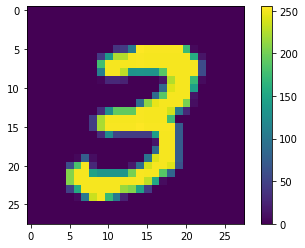

In [2]:
# Load the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
index = 7

plt.imshow(X_train[index]) # Show a single image
plt.colorbar() # Show range of values for each pixel in image

The colourbar on the right hand side of the plot indicates the value of each pixel in the image. We see that the values range from 0, to 255. While we could attempt to feed these images into a model directly, research has shown that models will train faster if all input values are within a smaller range, such as between 0 and 1. We can achieve this range by scaling the value of each pixel in each image down. This is implemented in the cell below.

In [3]:
# Scale the images to have values between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

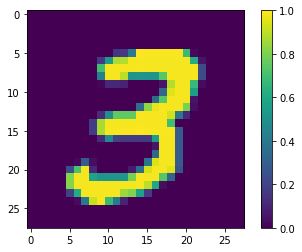

In [4]:
index = 7
plt.imshow(X_train[index])
plt.colorbar()

Our image pixels all have a value between 0 and 1 as desired. As a final step, we shall print the shape of each dataset. This is important as we shall need to ensure our model can take the required input size.

In [5]:
# Print the shape of the images and their associated labels
print('Shape X_train: ' + str(X_train.shape))
print('Shape Y_train: ' + str(Y_train.shape))
print('Shape X_test:  '  + str(X_test.shape))
print('Shape Y_test:  '  + str(Y_test.shape))

Shape X_train: (60000, 28, 28)
Shape Y_train: (60000,)
Shape X_test:  (10000, 28, 28)
Shape Y_test:  (10000,)


We see that we have 60000 images in out training dataset, and 10000 in our test dataset. All images are the same size, 28x28 pixels. 

### 1.6 Creating a Model

With everything we have now, we can attempt to create our first model. A model consists of several main components
* An input layer
* One or more hidden layers
* An output layer

The size of the input layer depends on the size of the image we want to give the model (28x28). The size of the output layer depends on the number of classes the model must predict. In this case, we want to predict the 10 digits (0-9), and so our output layer must have a size of 10.

Each layer also has an _activation function_. This is a function which is applied to the output of a given layer, before those values are passed to the next layer. An activation function allows a model to output a wider range of values, and so can help it get more accurate results.
In the final layer, we use the 'softmax' activation function. This function takes all the output values, and scales them so their total is 1. This means we can interpret the outputs as the probability the model thinks a given image is a given digit.

Before we can train the model, we must _compile_ it. This sets things such as the loss function (this measures how accurately our model is predicting digits, the lower the loss function the better!), and the optimizer, which aims to increase training speed. 

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # An input layer that takes the 28x28 image, and flattens into a 1x784 array
  tf.keras.layers.Dense(16, activation='sigmoid'), # A single hidden layer with 16 neurons
  tf.keras.layers.Dense(10, activation='softmax') # An output layer of size 10, for the 10 possible digits
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### 1.7 Training the Model

Our model is now built and compiled, and so we can now train it using _model.fit_. We must provide the data we wish to train on, as well as the number of epochs. A single epoch means we train the model on each image once. Multiple epochs means we train on each image multiple times, updating our model continuously. We can also provide the _batch size_. The batch size is how many images are passed through the model before the weight update, the learning process, is applied. In tensorflow, if no batch size is provided, a default size of 32 is used. In general, a larger batch size will result in a faster training time per epoch, but may also result in your model requiring more models to train.

In [26]:
hist = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5211 - accuracy: 0.9488 - val_loss: 1.5286 - val_accuracy: 0.9397
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5190 - accuracy: 0.9506 - val_loss: 1.5274 - val_accuracy: 0.9407
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5173 - accuracy: 0.9518 - val_loss: 1.5270 - val_accuracy: 0.9404
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5158 - accuracy: 0.9528 - val_loss: 1.5258 - val_accuracy: 0.9416
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5145 - accuracy: 0.9543 - val_loss: 1.5239 - val_accuracy: 0.9419
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5132 - accuracy: 0.9552 - val_loss: 1.5246 - val_accuracy: 0.9429
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5120 - accuracy: 0.9561 - val_loss: 1.5227 - val_accuracy:

Text(0.5, 1.0, 'Plot of model accuracy per epoch')

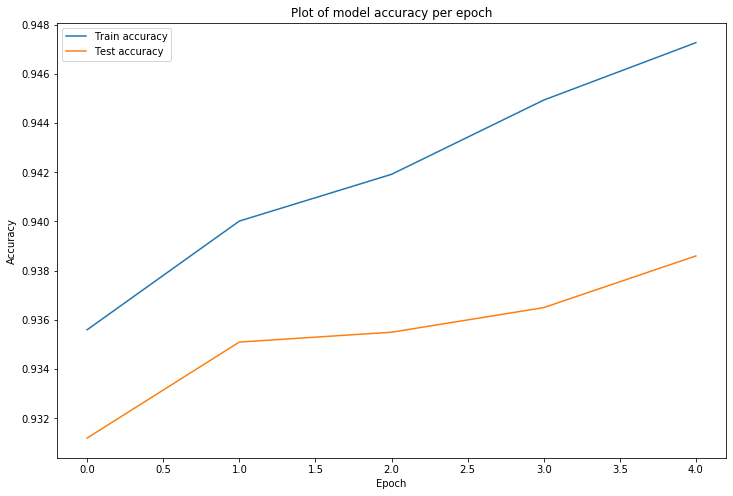

In [25]:
# Make plot of loss per epoch
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'], label="Train accuracy")
plt.plot(hist.history['val_accuracy'], label="Test accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of model accuracy per epoch")

### 1.8 Evaluate the Model

Now we have trained our model, we can see how it performs on data it hasn't seen yet, by evaluating on the test dataset.

#### Explain what the accuracy actually is 
# Plot of test accuracy + train accuracy

In [8]:
model.evaluate(X_test, Y_test, verbose=2)

313/313 - 0s - loss: 1.4968 - accuracy: 0.9673


[1.4967870712280273, 0.9672999978065491]

To give a more concrete view, the two functions below are provided. The first will plot an individual image, as well as the models outputs for the image. The second function finds images which the model incorrectly tags.

In [23]:
def PlotModelOutput(model, x, y, index=0):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))
    
    ax1.set_title("Image")
    ax2.set_title("Model digit predictions")
    ax2.set_xlabel("Digit")
    ax2.set_ylabel("Model output")
    image = x[index]
    prediction = model.predict(np.expand_dims(x[index], axis=0))[0]
    ax1.imshow(image.reshape(28,28))
    ax2.bar(np.linspace(0,9, 10), prediction)
    ax2.set_xticks(np.linspace(0,9,10))
    fig.suptitle(f"Image tag: {y[index]}, Model output: {np.argmax(prediction)}")
    
def FindNextWrongPrediction(model, x, y, index=0):
    '''
    Finds the next image index that the model incorrectly predicts
    
    Parameters:
        model - the trained tensorflow model
        x - the images to test
        y - the correct labels for each image
        index - the start index to search from (default is 0)
        
    Returns:
        i - the next image index that the model predicts incorrecly. Returns -1 
            if no incorrect prediction is found.
    '''
    predictions = model.predict(x)
    
    for i in range(index, len(predictions)):
        
        if(np.argmax(predictions[i]) != y[i]):
            return i
    # Should only happen if no incorrect digit is found
    return -1

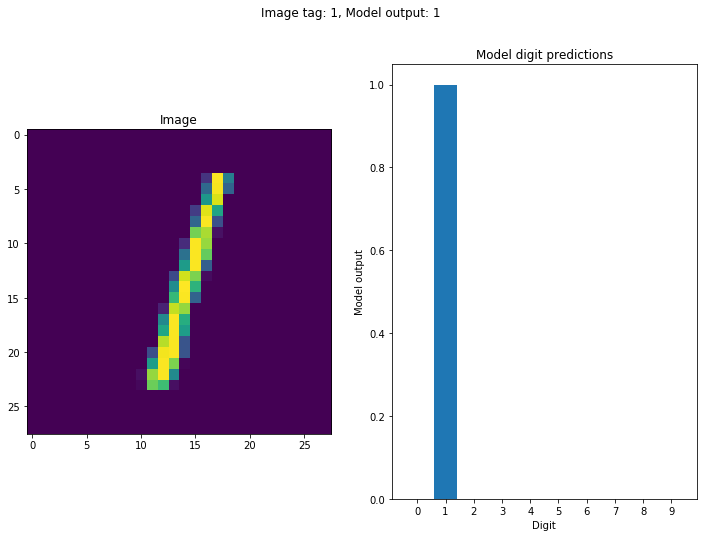

In [24]:
# Plot a digit, as well as the models output
PlotModelOutput(model, X_test, Y_test, 2)

We see that this digit was easy to tag. The model predicted with near 100% certainty that this digit was a '1'.
Let us now search for an incorrectly tagged image

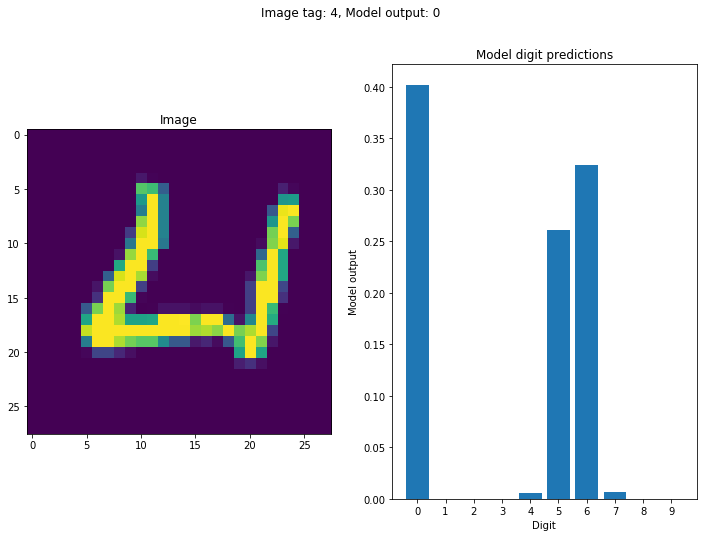

In [11]:
# Get an index that is incorrectly tagged
index_inc = FindNextWrongPrediction(model, X_test, Y_test)
# Plot the image and the model output for incorrectly tagged image.
PlotModelOutput(model, X_test, Y_test, index_inc)

#### Task 3? Look through incorrect number

### 1.9 Improving the Model
So far, we have made a simple model using only 2 hidden layers, both using the sigmoid activation function.
Now its your turn, try and add or remove layers, changing the number of neurons in a layer, or changing the activation function. An overview of popular activation functions is provided [here](https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6).

Try and get the highest accuracy for the test dataset via _model.evaluate_



In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='sigmoid'), # Change this!
  tf.keras.layers.Dense(32, activation='sigmoid'), # Or this?!
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
print("Start model training\n")
model.fit(X_train, Y_train, epochs=10, batch_size=32)
print("Model training complete\n")
model.evaluate(X_test, Y_test, verbose=2)

Start model training

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7833 - accuracy: 0.7254
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5481 - accuracy: 0.9285
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5231 - accuracy: 0.9467
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5116 - accuracy: 0.9559
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5043 - accuracy: 0.9622
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4990 - accuracy: 0.9663
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4947 - accuracy: 0.9705
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4911 - accuracy: 0.9737
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4878 - accuracy: 0.9765
Epoch 10/10
1875/1875 [==============================] - 3s 

[1.4943968057632446, 0.9692999720573425]

In [ ]:
# Write your results!
results = []

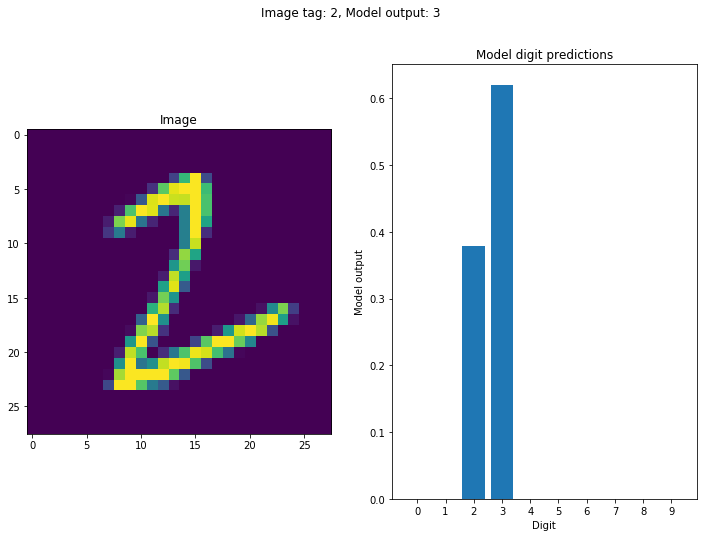

In [13]:
# Get an index that is incorrectly tagged
index_inc = FindNextWrongPrediction(model, X_test, Y_test)
# Plot the image and the model output for incorrectly tagged image.
PlotModelOutput(model, X_test, Y_test, index_inc)

### 2. Introducing a Convolutional Neural Network

KERNEL -> filter, remove images, filter looks for relationships between groups of pixels.

So far, we have looked only at the most basic form of a deep neural network, where we take our image and transform it into a 1 dimensional list of numbers. The problem with this approach, is that an image that is flipped, or translated, or rotated, will register as a different image to the neural network. For image recognition tasks this is a problem. To improve, we can utilise what is known as a convolutional neural network (CNN).

### 2.1 How a CNN works
A CNN utilises what is known as a kernel. The kernal is a grid of numbers, which we combine with a section of our image to produce an output, as shown below
![kernel](https://anhreynolds.com/img/cnn.png)
Kernels are very powerful. For example, below we show how a kernal can find edges in an example image
![edge detection](https://anhreynolds.com/img/edge-detection-vertical.png)

### 2.2 Data preparation
In a CNN, we let the model learn the optimal kernal. By doing so, we allow for our model to better identify our digits.
First, we need to slightly change the shape of our datasets so they can be easily passed to the CNN layer, we do this in the code cell below.

In [25]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)


### 2.3 First CNN

To make a CNN, we simply add a Conv2D layer at the start of our model. We must also add a 'Flatten' layer after the Conv2D layer, so that the remaining dense layers can function.
The Conv2D layers has 2 main different parameters compared to the dense layers. The first parameter is the number of individual kernels to produce. For example, if we choose 8, a total of 8 kernals shall be produced, resulting in 8 seperate images. The second parameter defines the size of each kernel. For example, (3, 3) will use kernels that are 3x3.
A basic CNN is implemented below.

In [27]:
model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16,activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model_cnn.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
print("Start model training\n")
model_cnn.fit(X_train_cnn, Y_train, epochs=10, batch_size=32)
print("Model training complete\n")
model_cnn.evaluate(X_test_cnn, Y_test, verbose=2)

Start model training

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7340 - accuracy: 0.8284
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5519 - accuracy: 0.9361
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5204 - accuracy: 0.9552
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5062 - accuracy: 0.9661
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4985 - accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4933 - accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4892 - accuracy: 0.9787
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4860 - accuracy: 0.9811
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4835 - accuracy: 0.9835
Epoch 10/10
1875/1875 [==============================] - 8s 

[1.4922610521316528, 0.9731000065803528]

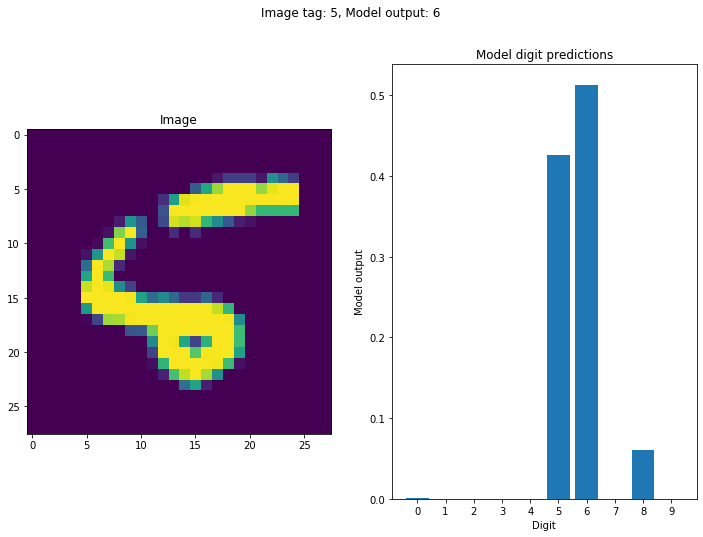

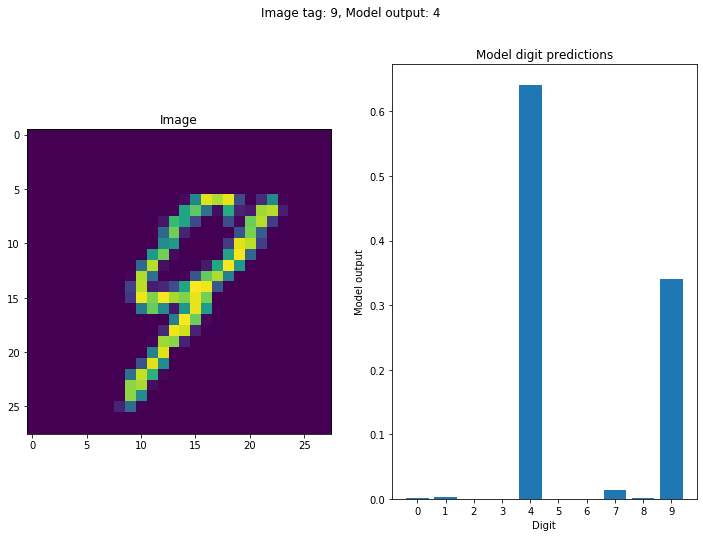

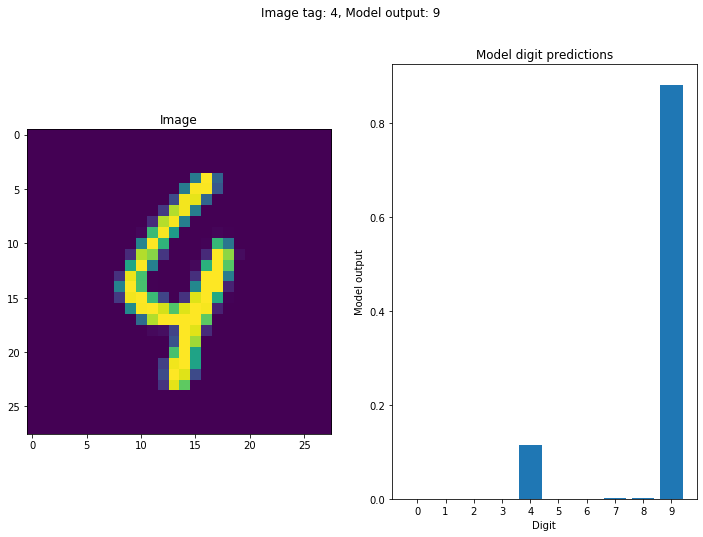

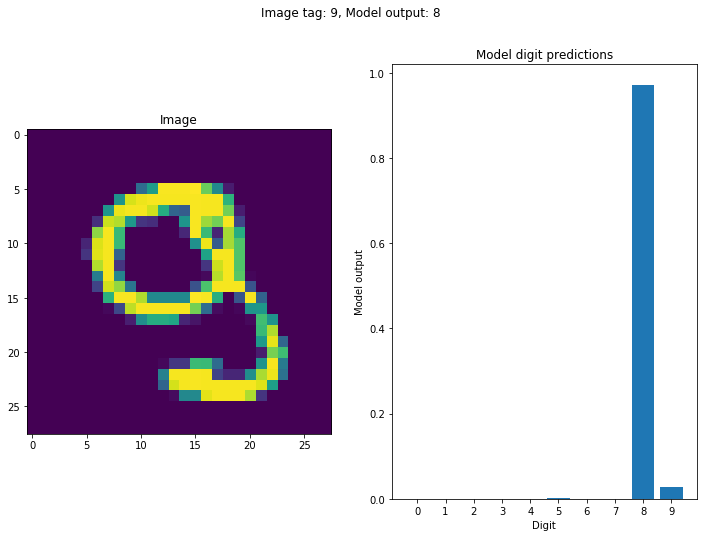

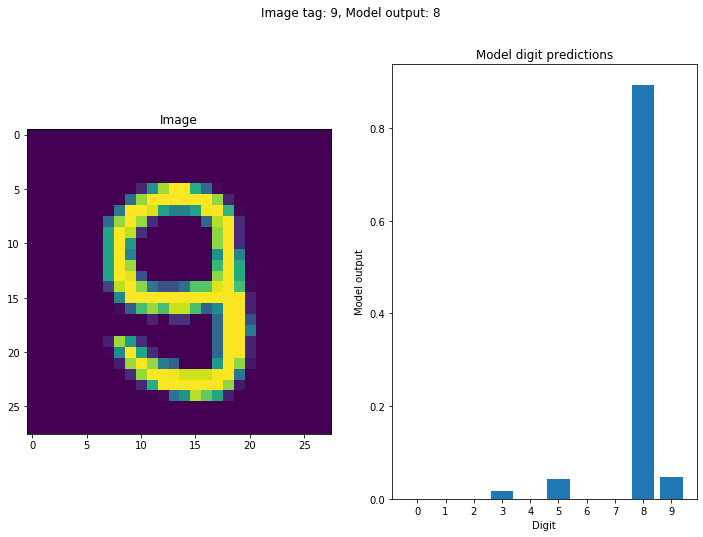

In [29]:
# Start searching from the first image
index_inc = 0
for i in range(5):
    # Get an index that is incorrectly tagged
    index_inc = FindNextWrongPrediction(model_cnn, X_test_cnn, Y_test, index_inc)
    # Plot the image and the model output for incorrectly tagged image.
    PlotModelOutput(model_cnn, X_test_cnn, Y_test, index_inc)
    # Add 1 to this number so we search for the next incorrect index
    index_inc+=1

### Add noise to test dataset, show images with noise, show how much accuracy drops when we add noise

### 2.4 Improving the CNN

Now that we've got a simple CNN working, its your turn to play around and see if you can improve the final accuracy!

In [18]:
# Change some stuff to try and improve the accuracy!
model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'), 
  tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model_cnn.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
print("Start model training\n")
model_cnn.fit(X_train_cnn, Y_train, epochs=10)
print("Model training complete\n")
model_cnn.evaluate(X_test_cnn, Y_test, verbose=2)

Start model training

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6069 - accuracy: 0.8972
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5000 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4847 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4775 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4740 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4715 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4697 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.4682 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.4677 - accuracy: 0.9941
Epoch 10/10
1875/1875 [============================

[1.4777361154556274, 0.9836999773979187]

### 3. Advanced - Making it Scientific
So far, we have asked you to change things bit by bit in an attempt to improve model performance. While this can be fun, trends in improvements in model performance can be found through a more scientific analysis of the model performance.

To do this, we want to change 1 single aspect of our model, and test for a range of values, before outputting some result to be analysed. For example, it was mentioned earlier that increasing batch size can decrease training time per epoch, but may need more epochs to achieve the same accuracy. We shall now test this claim below.

In [20]:
batch_size_to_test = [8, 16, 32, 64, 128] # I choose powers of 2 because they look nice
# Create empty lists to store the training times and accuracy
training_times = []
training_acc = []


for batch_size in batch_size_to_test:
    # Create a new model for each test
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)), 
      tf.keras.layers.Dense(64, activation='sigmoid'), 
      tf.keras.layers.Dense(32, activation='sigmoid'), 
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
    # Get the current time before we train the model
    start = time()
    print("Training model with batch size " + str(batch_size))
    # Train the model with constant number of epochs, but 
    # with different batch sizes
    model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, verbose=0)
    
    # Calculate time taken, and model accuracy
    time_taken = time() - start
    (loss, acc) = model.evaluate(X_test, Y_test, verbose=0)
    
    # Append these values to our results list
    training_times.append(time_taken)
    training_acc.append(acc)

Training model with batch size 8
Training model with batch size 16
Training model with batch size 32
Training model with batch size 64
Training model with batch size 128


Text(0.5, 1.0, 'Plot comparing model batch size to model training time.')

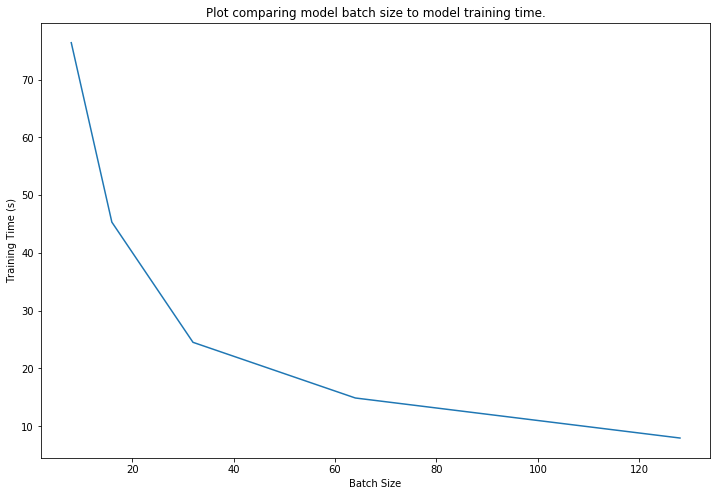

In [21]:
plt.figure(figsize=(12,8))
plt.plot(batch_size_to_test, training_times)
plt.xlabel("Batch Size")
plt.ylabel("Training Time (s)")
plt.title("Plot comparing model batch size to model training time.")

Text(0.5, 1.0, 'Plot comparing model batch size to model accuracy.')

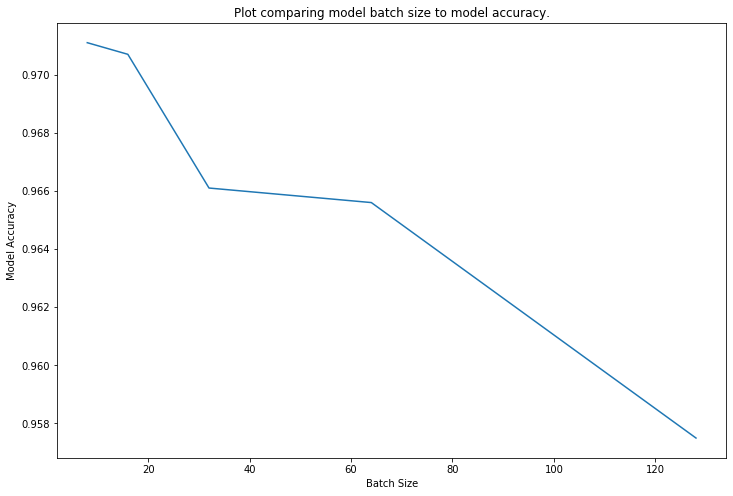

In [22]:
plt.figure(figsize=(12,8))
plt.plot(batch_size_to_test, training_acc)
plt.xlabel("Batch Size")
plt.ylabel("Model Accuracy")
plt.title("Plot comparing model batch size to model accuracy.")

As was originially suggested, increasing the batch size resulted in a drastic decrease in training time, at the cost of a lower final accuracy for the model. We often see such trade offs in machine learning, where a process which decreases training time may slightly reduce accuracy. Its up to the scientist to decide if a trade off is worth it!

In this case, we see that the final accuracy decreases slightly, while the training time decreases by a factor of 10. This decrease in training time could mean we could train for more epochs, or use a more complex model architecture (more layers, more neurons per layer).


### 3.1 Advanced - Your turn!

Now that we've shown how you can easily test a range of values for a model, its your turn to see what trends you can find. Try changing some other aspect of the model, and see how this effects the training time and model accuracy. Good luck!